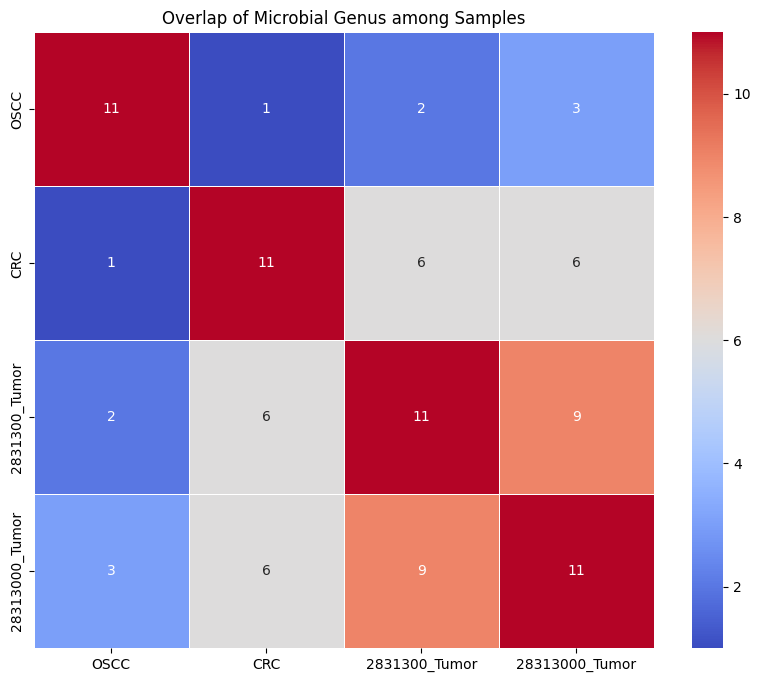

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 샘플 데이터 준비
data = {
    "CRC": ["Bacteroides", "Cronobacter", "Enterobacter", "Erwinia", "Klebsiella", "Pantoea", "Pseudomonas", "Serratia", "Shewanella", "Vibrio", "Yersinia"],
    "OSCC": ["Bacillus", "Bacteroides", "Blattabacterium", "Clostridium", "Flavobacterium", "Fusobacterium", "Lactobacillus", "Paenibacillus", "Porphyromonas", "Prevotella", "Streptococcus"],
    "2831300_Tumor": ["Acinetobacter", "Enterobacter", "Erwinia", "Fusobacterium", "Klebsiella", "Pantoea", "Pectobacterium", "Providencia", "Serratia", "Streptococcus", "Yersinia"],
    "28313000_Tumor": ["Acinetobacter", "Bacillus", "Enterobacter", "Fusobacterium", "Klebsiella", "Pantoea", "Pectobacterium", "Serratia", "Streptococcus", "Vibrio", "Yersinia"]
}

# 겹치는 미생물의 수를 계산하여 DataFrame 생성
sample_names = list(data.keys())
overlap_matrix = pd.DataFrame(index=sample_names, columns=sample_names, dtype=int)

for sample1 in sample_names:
    for sample2 in sample_names:
        overlap_matrix.loc[sample1, sample2] = len(set(data[sample1]) & set(data[sample2]))

# 모든 값을 정수형으로 강제 변환
overlap_matrix = overlap_matrix.astype(int)

# 계층적 클러스터링을 수행하여 행과 열의 순서 정하기
link = linkage(overlap_matrix, method='average')
dendro = dendrogram(link, labels=sample_names, no_plot=True)
ordered_samples = dendro['ivl']

# 순서대로 정렬된 데이터로 히트맵 생성
ordered_matrix = overlap_matrix.loc[ordered_samples, ordered_samples]

# 히트맵 그리기
plt.figure(figsize=(10, 8))
sns.heatmap(ordered_matrix, annot=True, cmap='coolwarm', fmt='g', linewidths=.5)
plt.title('Overlap of Microbial Genus among Samples')
plt.show()


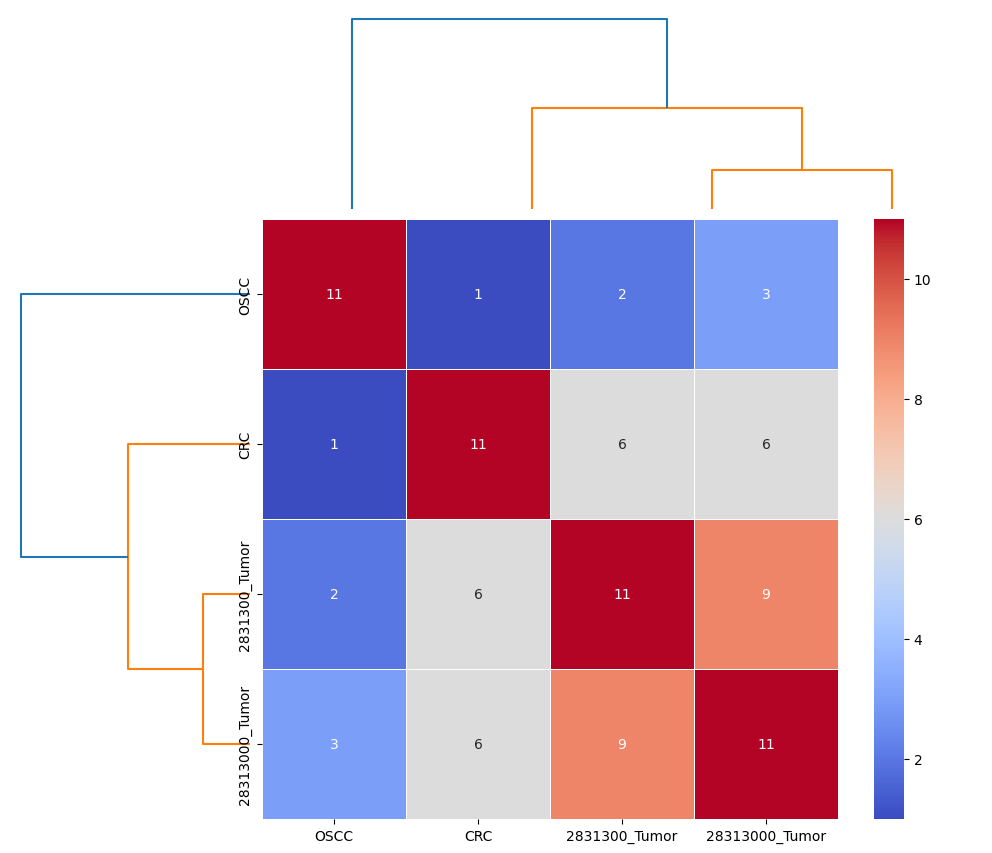

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage

# 샘플 데이터 준비
data = {
    "CRC": ["Bacteroides", "Cronobacter", "Enterobacter", "Erwinia", "Klebsiella", "Pantoea", "Pseudomonas", "Serratia", "Shewanella", "Vibrio", "Yersinia"],
    "OSCC": ["Bacillus", "Bacteroides", "Blattabacterium", "Clostridium", "Flavobacterium", "Fusobacterium", "Lactobacillus", "Paenibacillus", "Porphyromonas", "Prevotella", "Streptococcus"],
    "2831300_Tumor": ["Acinetobacter", "Enterobacter", "Erwinia", "Fusobacterium", "Klebsiella", "Pantoea", "Pectobacterium", "Providencia", "Serratia", "Streptococcus", "Yersinia"],
    "28313000_Tumor": ["Acinetobacter", "Bacillus", "Enterobacter", "Fusobacterium", "Klebsiella", "Pantoea", "Pectobacterium", "Serratia", "Streptococcus", "Vibrio", "Yersinia"]
}

# 겹치는 미생물의 수를 계산하여 DataFrame 생성
sample_names = list(data.keys())
overlap_matrix = pd.DataFrame(index=sample_names, columns=sample_names, dtype=int)

for sample1 in sample_names:
    for sample2 in sample_names:
        overlap_matrix.loc[sample1, sample2] = len(set(data[sample1]) & set(data[sample2]))

# 모든 값을 정수형으로 강제 변환
overlap_matrix = overlap_matrix.astype(int)

# 계층적 클러스터링 수행
row_linkage = linkage(overlap_matrix, method='average')
col_linkage = linkage(overlap_matrix.T, method='average')

# 플롯 구성
fig = plt.figure(figsize=(12, 10))

# 히트맵과 덴드로그램 축 추가
ax_dendro_row = fig.add_axes([0.09, 0.1, 0.2, 0.6])
ax_dendro_col = fig.add_axes([0.3, 0.71, 0.6, 0.2])
ax_heatmap = fig.add_axes([0.3, 0.1, 0.6, 0.6])

# 행과 열의 덴드로그램 그리기
dendrogram(row_linkage, orientation='left', ax=ax_dendro_row)
dendrogram(col_linkage, orientation='top', ax=ax_dendro_col)

ax_dendro_row.invert_yaxis()
ax_dendro_row.axis('off')
ax_dendro_col.axis('off')

# 순서대로 정렬된 데이터로 히트맵 생성
row_order = dendrogram(row_linkage, no_plot=True)['leaves']
col_order = dendrogram(col_linkage, no_plot=True)['leaves']
ordered_matrix = overlap_matrix.iloc[row_order, col_order]

# 히트맵 그리기
sns.heatmap(ordered_matrix, annot=True, cmap='coolwarm', fmt='g', linewidths=.5, ax=ax_heatmap)

plt.show()
